# PROV Templates in Python

Author: Stephan Kindermann

Affiliation: DKRZ

Community: ENES (Earth System Sciences)

Version: 0.1 (July 2018)
    
**Motivation:**
PROV template expansion currently is only supported by the **provconvert** java tool.
Yet initial generation and integration of PROV descriptions as part of community efforts 
is oftenly done by adopting interactive languages like python.
Additionally sharing PROV adoption narratives is well supported by using jupyter notebooks.
Finally in our community (ENES) core infrastructure services are implemented using python and 
thus also prov documents will be generated mostly based on python. The usage of the
java based provconvert tool to instantiate templates hinders the adoption of PROV in 
our community. Besides the necessity to install the tool and use java the key drawback is that provconvert output can not be converted into a python prov document (python prov only supports deserialization from prov-json which is not supported as an output format of provconvert). 
(What is needed in the short term are simple python based wrappers integrated in our
community workflow, generating prov descriptions best on the basis of prov template instantiations).

**Approach taken**
Thus a simple approach is taken which on the one hand side allows to use PROV templates and which
on the other hand side allows for pure python based template instantiations.
Drawback is that the elaborated prov expansion algorithm can not be used - yet to make the expansion
explicit on the basis of python can also seen as an advantage as the community PROV adopters don't
need to dig into the expansion algorithm implemented as part of provconvert (and eventual errors therein).

The approach taken is illustrated in the following:
    
* PROV templates (being standard PROV documents) are generated in Python based on the prov library.
* The syntax of thes PROV templates is aligned to the mako python templating language -
these templates are callec PROV-py templates in the following.
* PROV-py templates can be simply expanded to standard PROV templates and can thus 
be further processed by the provconvert tool
* PROV-py templates can be simply instantiated in python using the mako templationg approach

## Generate a PROV-py template
syntactically PROV-py templates on one hand side PROV templates with a different syntactical
characterization of the *variable* parts. On the other side PROV-py templates are templates 
which can be directly processed using the mako templating approach. 


Algorithm to translate mako template into prov template: 
(simple string replacement - can also be done by using mako .. :-) 

* replace   ="${xxxx}"     by  =var:xxxx

* replace   var:${yyyy}  by  var:yyyy 

In the following the approach is illustrated based on the first example in the provconvert tutorial. 

In [68]:
import prov.model as prov

document = prov.ProvDocument()


document.add_namespace('prov','http://www.w3.org/ns/prov#')
document.add_namespace('var','http://openprovenance.org/var#>')

document.add_namespace('vargen','http://openprovenance.org/vargen#')
document.add_namespace('tmpl','http://openprovenance.org/tmpl#')
document.add_namespace('foaf','http://xmlns.com/foaf/0.1/')

#document.set_default_namespace('http://example.org/0/')
#document.add_namespace('rdf','http://www.w3.org/1999/02/22-rdf-syntax-ns#')
#document.add_namespace('rdfs','http://www.w3.org/2000/01/rdf-schema#')
#document.add_namespace('xsd','http://www.w3.org/2001/XMLSchema#')
#document.add_namespace('ex1', 'http://example.org/1/')
#document.add_namespace('ex2', 'http://example.org/2/')
#document.add_namespace('ex', 'http://example.org/')


bundle = document.bundle('vargen:bundleid')
#bundle.set_default_namespace('http://example.org/0/')
quote = bundle.entity('var:quote',(
     ('prov:value','${value}'),
))    

author = bundle.entity('var:${author}',
    ((prov.PROV_TYPE, "prov:Person"),
    ('foaf:name','${name}')) ) 

bundle.wasAttributedTo('var:quote','var:${author}')

templ1 = document.get_provn()
print(templ1)


document
  prefix var <http://openprovenance.org/var#>>
  prefix vargen <http://openprovenance.org/vargen#>
  prefix tmpl <http://openprovenance.org/tmpl#>
  prefix foaf <http://xmlns.com/foaf/0.1/>
  
  bundle vargen:bundleid
    entity(var:quote, [prov:value="${value}"])
    entity(var:${author}, [prov:type="prov:Person", foaf:name="${name}"])
    wasAttributedTo(var:quote, var:${author})
  endBundle
endDocument


## Convert the PROV-py provn serialization into a mako template

In [63]:
from mako.template import Template
mtempl1 = Template(templ1)

## Convert the PROV-py mako template into a standard PROV template

* variable property names xxx are instantiated as 'var:xxx'
* variable entity names yyy are instantiated as yyy

In [69]:
print(mtempl1.render(value='var:value',name='var:name',author='author'))

document
  prefix var <http://openprovenance.org/var#>>
  prefix vargen <http://openprovenance.org/vargen#>
  prefix tmpl <http://openprovenance.org/tmpl#>
  prefix foaf <http://xmlns.com/foaf/0.1/>
  
  bundle vargen:bundleid
    entity(var:quote, [prov:value="var:value"])
    entity(var:author, [prov:type="prov:Person", foaf:name="var:name"])
    wasAttributedTo(var:quote, var:author)
  endBundle
endDocument


## Compare generated PROV template with original example: 

In [ ]:
# %load Downloads/ProvToolbox-Tutorial4-0.7.0/src/main/resources/template1.provn

document

  prefix var <http://openprovenance.org/var#>
  prefix vargen <http://openprovenance.org/vargen#>
  prefix tmpl <http://openprovenance.org/tmpl#>

  prefix foaf <http://xmlns.com/foaf/0.1/>
  
  bundle vargen:bundleId
    entity(var:quote, [prov:value='var:value'])
    entity(var:author, [prov:type='prov:Person', foaf:name='var:name'])
    wasAttributedTo(var:quote,var:author)
  endBundle

endDocument


## Instantiate PROV-py template 

In [ ]:
# take same instantiation as in the tutorial:
# %load Downloads/ProvToolbox-Tutorial4-0.7.0/src/main/resources/binding1.ttl
@prefix prov: <http://www.w3.org/ns/prov#> .
@prefix xsd: <http://www.w3.org/2001/XMLSchema#> .
@prefix tmpl: <http://openprovenance.org/tmpl#> .
@prefix var: <http://openprovenance.org/var#> .
@prefix ex: <http://example.com/#> .

var:author a prov:Entity;
           tmpl:value_0 <http://orcid.org/0000-0002-3494-120X>.
var:name   a prov:Entity;
           tmpl:2dvalue_0_0 "Luc Moreau".
var:quote  a prov:Entity;
           tmpl:value_0 ex:quote1.
var:value  a prov:Entity;
           tmpl:2dvalue_0_0 "A Little Provenance Goes a Long Way".



In [71]:
print(mtempl1.render(value="A Little Provenance Goes a Long Way",
                     name="Luc Moreau",
                     author="http://orcid.org/0000-0002-3494-120X"))

document
  prefix var <http://openprovenance.org/var#>>
  prefix vargen <http://openprovenance.org/vargen#>
  prefix tmpl <http://openprovenance.org/tmpl#>
  prefix foaf <http://xmlns.com/foaf/0.1/>
  
  bundle vargen:bundleid
    entity(var:quote, [prov:value="A Little Provenance Goes a Long Way"])
    entity(var:http://orcid.org/0000-0002-3494-120X, [prov:type="prov:Person", foaf:name="Luc Moreau"])
    wasAttributedTo(var:quote, var:http://orcid.org/0000-0002-3494-120X)
  endBundle
endDocument


## Instantiate PROV template using provconvert and compare results

In [9]:
!provconvert -infile Downloads/ProvToolbox-Tutorial4-0.7.0/src/main/resources/template1.provn -bindings Downloads/ProvToolbox-Tutorial4-0.7.0/src/main/resources/binding1.ttl -outfile Downloads/ProvToolbox-Tutorial4-0.7.0/target/doc1.provn

bindings version is 1


In [10]:
!provconvert -infile Downloads/ProvToolbox-Tutorial4-0.7.0/target/doc1.provn -outfile Downloads/ProvToolbox-Tutorial4-0.7.0/target/doc1.png


In [11]:
!provconvert -infile Downloads/ProvToolbox-Tutorial4-0.7.0/src/main/resources/template1.provn -outfile Downloads/ProvToolbox-Tutorial4-0.7.0/target/template1.png

In [ ]:
# %load Downloads/ProvToolbox-Tutorial4-0.7.0/target/doc1.provn
document
bundle uuid:4c7236d5-6420-4a88-b192-6089e27aa88e
prefix foaf <http://xmlns.com/foaf/0.1/>
prefix pre_0 <http://orcid.org/>
prefix ex <http://example.com/#>
prefix uuid <urn:uuid:>

entity(ex:quote1,[prov:value = "A Little Provenance Goes a Long Way" %% xsd:string])
entity(pre_0:0000-0002-3494-120X,[prov:type = 'prov:Person', foaf:name = "Luc Moreau" %% xsd:string])
wasAttributedTo(ex:quote1, pre_0:0000-0002-3494-120X)
endBundle
endDocument


In [ ]:
# ToDo:
- correct namespace handling in instantiation .. 


In [ ]:
#------------------------to be removeed ------------------------------------

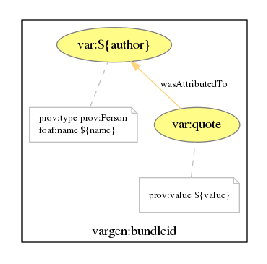

In [65]:
%matplotlib inline
document.plot()

In [2]:
!cat Downloads/ProvToolbox-Tutorial4-0.7.0/Makefile


do.all:
	mkdir target
	$(MAKE) expand1
	$(MAKE) expand2
	$(MAKE) expand3
	$(MAKE) expand4
	$(MAKE) expand5


expand1:
	provconvert -infile src/main/resources/template1.provn -bindings src/main/resources/binding1.ttl -outfile target/doc1.provn
	provconvert -infile target/doc1.provn -outfile target/doc1.png
	provconvert -infile src/main/resources/template1.provn -outfile target/template1.png

expand2:
	provconvert -infile src/main/resources/template1.provn -bindings src/main/resources/binding2.ttl -outfile target/doc2.provn
	provconvert -infile target/doc2.provn -outfile target/doc2.png


expand3:
	provconvert -infile src/main/resources/template1.provn -bindings src/main/resources/binding3.ttl -outfile target/doc3.provn
	provconvert -infile target/doc3.provn -outfile target/doc3.png


expand4:
	provconvert -infile src/main/resources/template2.provn -bindings src/main/resources/binding4.ttl -outfile target/doc4.provn
	provconvert -infile target/doc4.provn -outfile target/doc4.png
	provco

# Show result

![in](./Downloads/ProvToolbox-Tutorial4-0.7.0/target/doc1.png)
![out](./Downloads/ProvToolbox-Tutorial4-0.7.0/target/doc2.png)